In [17]:
# from google.colab import drive
# drive.mount('/content/driver/')

In [18]:
!pip install ultralytics

In [19]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.147  Python-3.9.0 torch-2.5.0+cpu CPU (11th Gen Intel Core(TM) i5-1135G7 2.40GHz)
Setup complete  (8 CPUs, 7.7 GB RAM, 221.8/443.1 GB disk)


In [20]:
import os
import glob
from ultralytics import YOLO
from IPython.display import Image, display

In [21]:
%cd /content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection
!ls

[WinError 3] The system cannot find the path specified: '/content/driver/MyDrive/Colab_Notebooks/Computer_Vision/Animal_Species_Detection'
d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\notebooks


'ls' is not recognized as an internal or external command,
operable program or batch file.


### Train the Model

In [22]:
!yolo task=detect mode=train model=yolov8n.pt data=custom.yaml epochs=50 imgsz=640

d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\nn\tasks.py:560: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return to

In [23]:
!ls 'runs/detect/train'

'ls' is not recognized as an internal or external command,
operable program or batch file.


## Visualize the training output

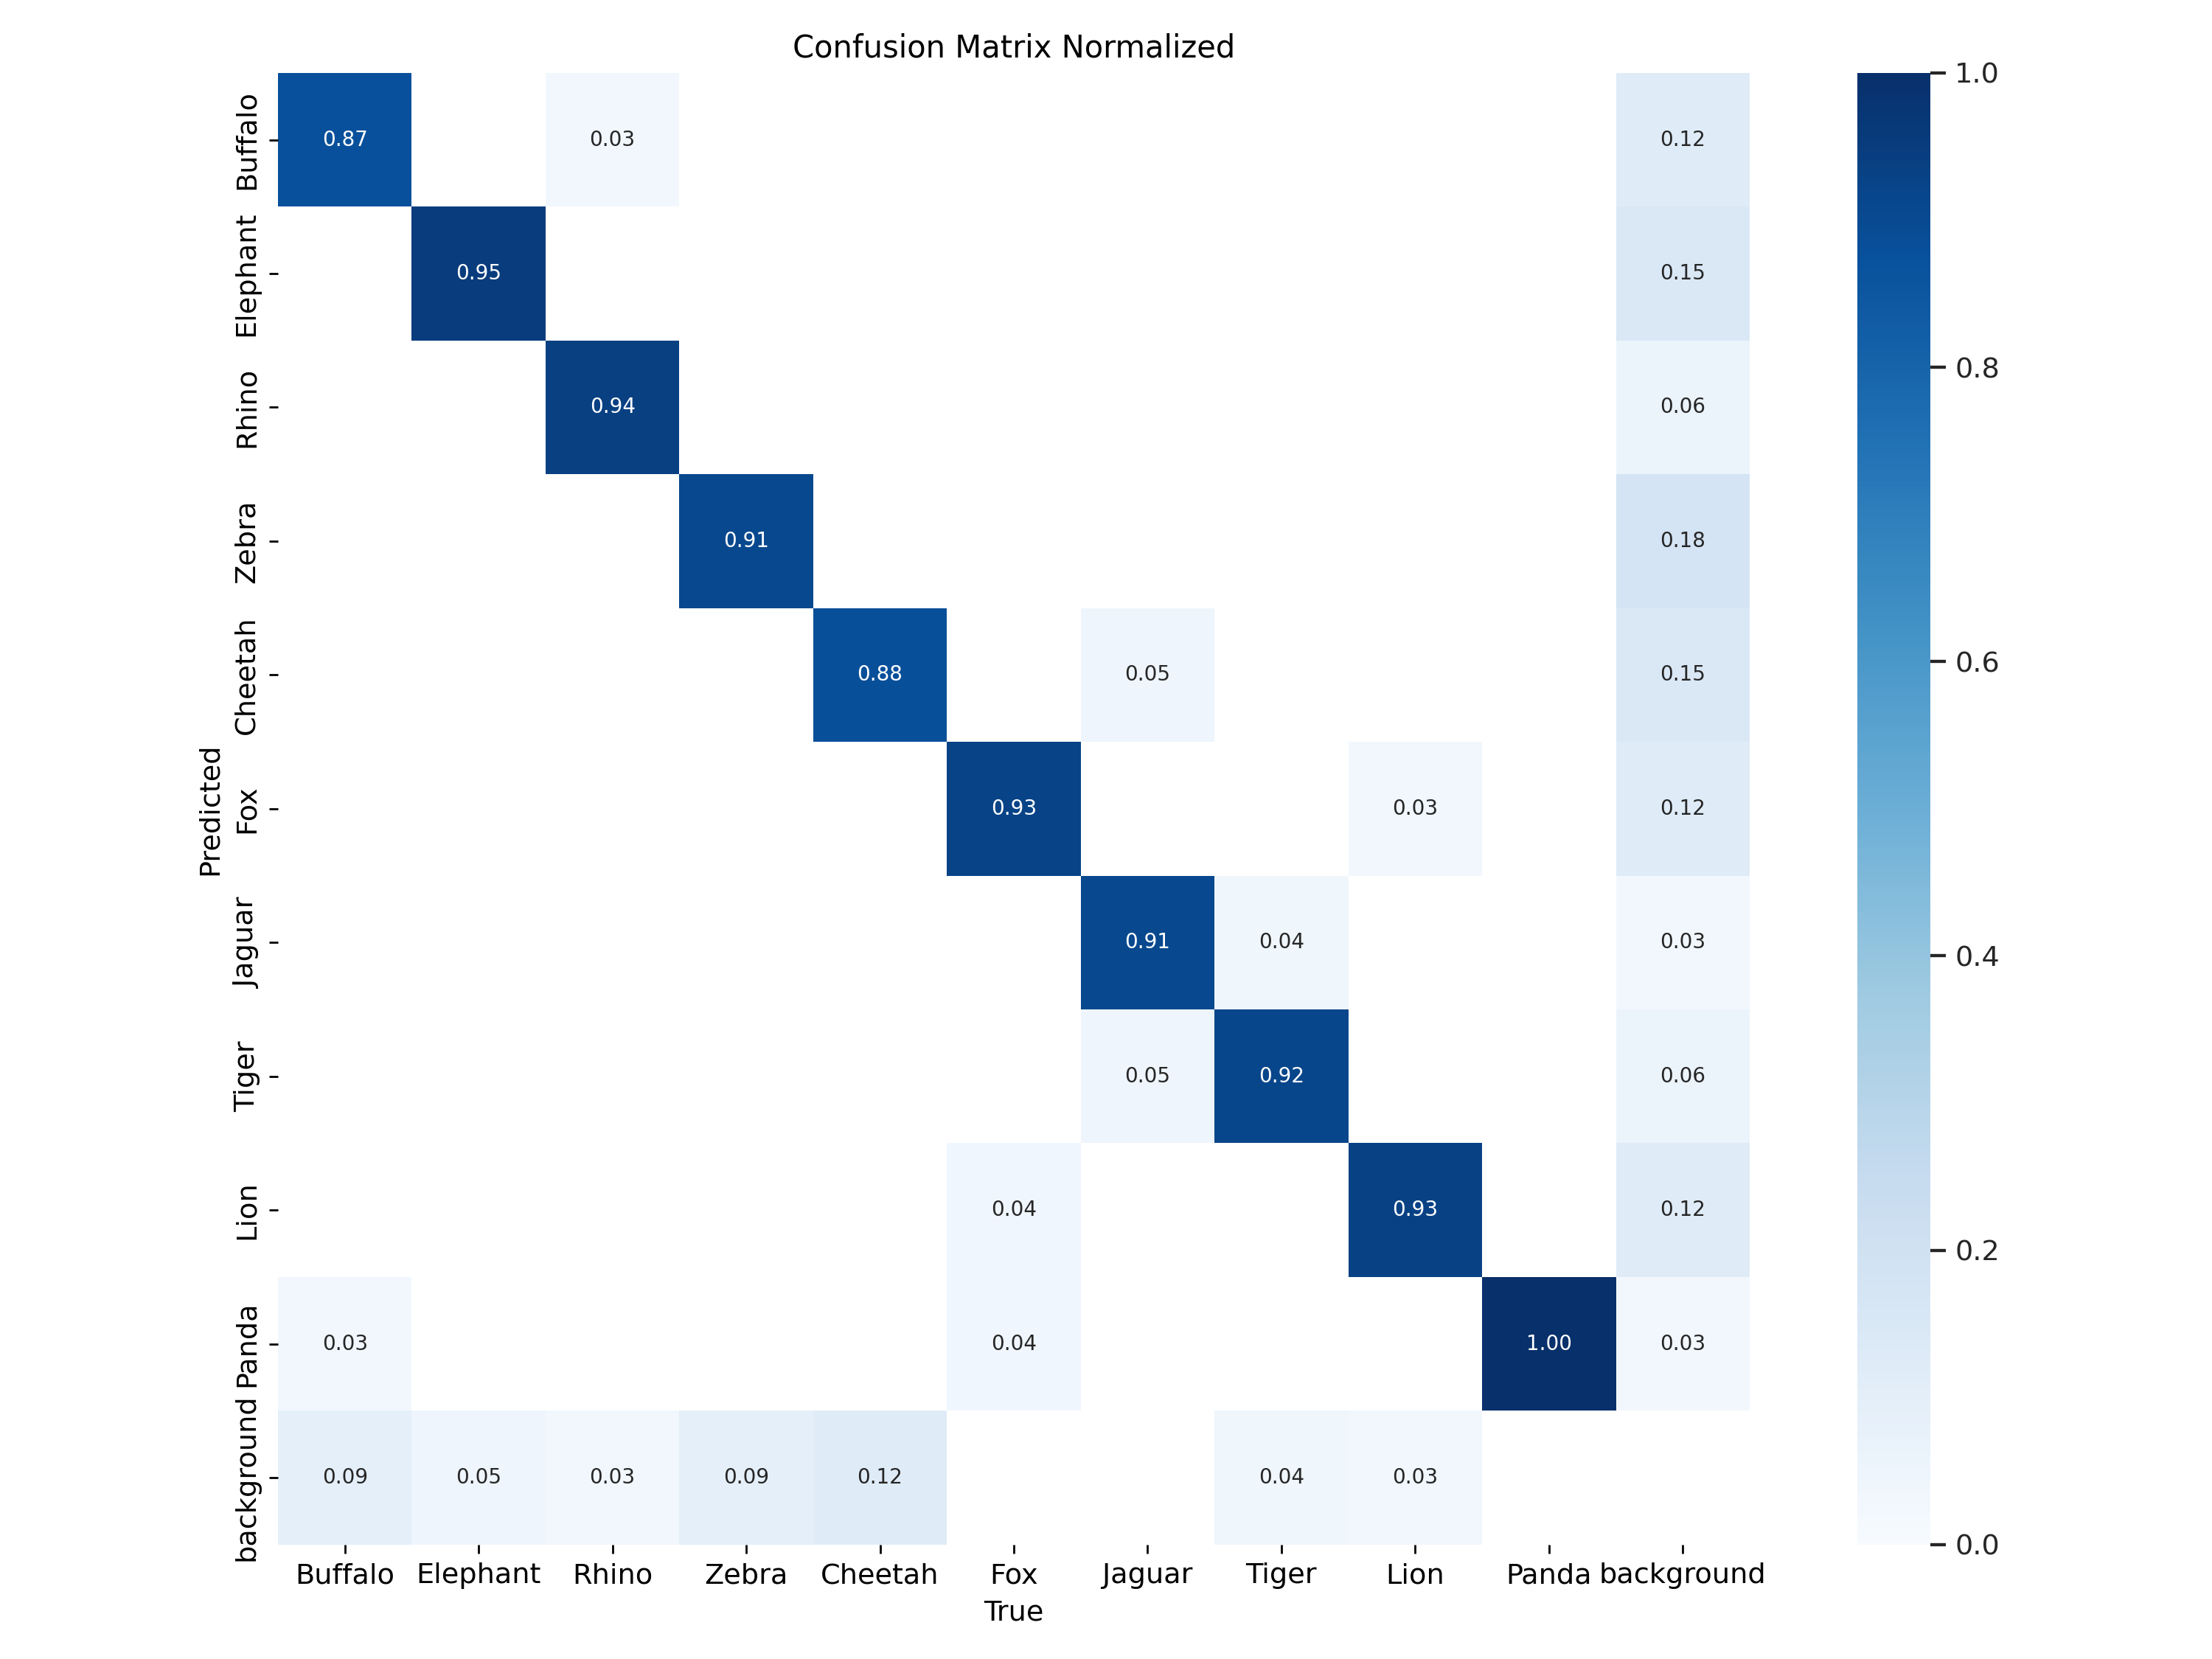

In [24]:
display(Image(filename="runs/detect/train/confusion_matrix_normalized.png", width=1000))

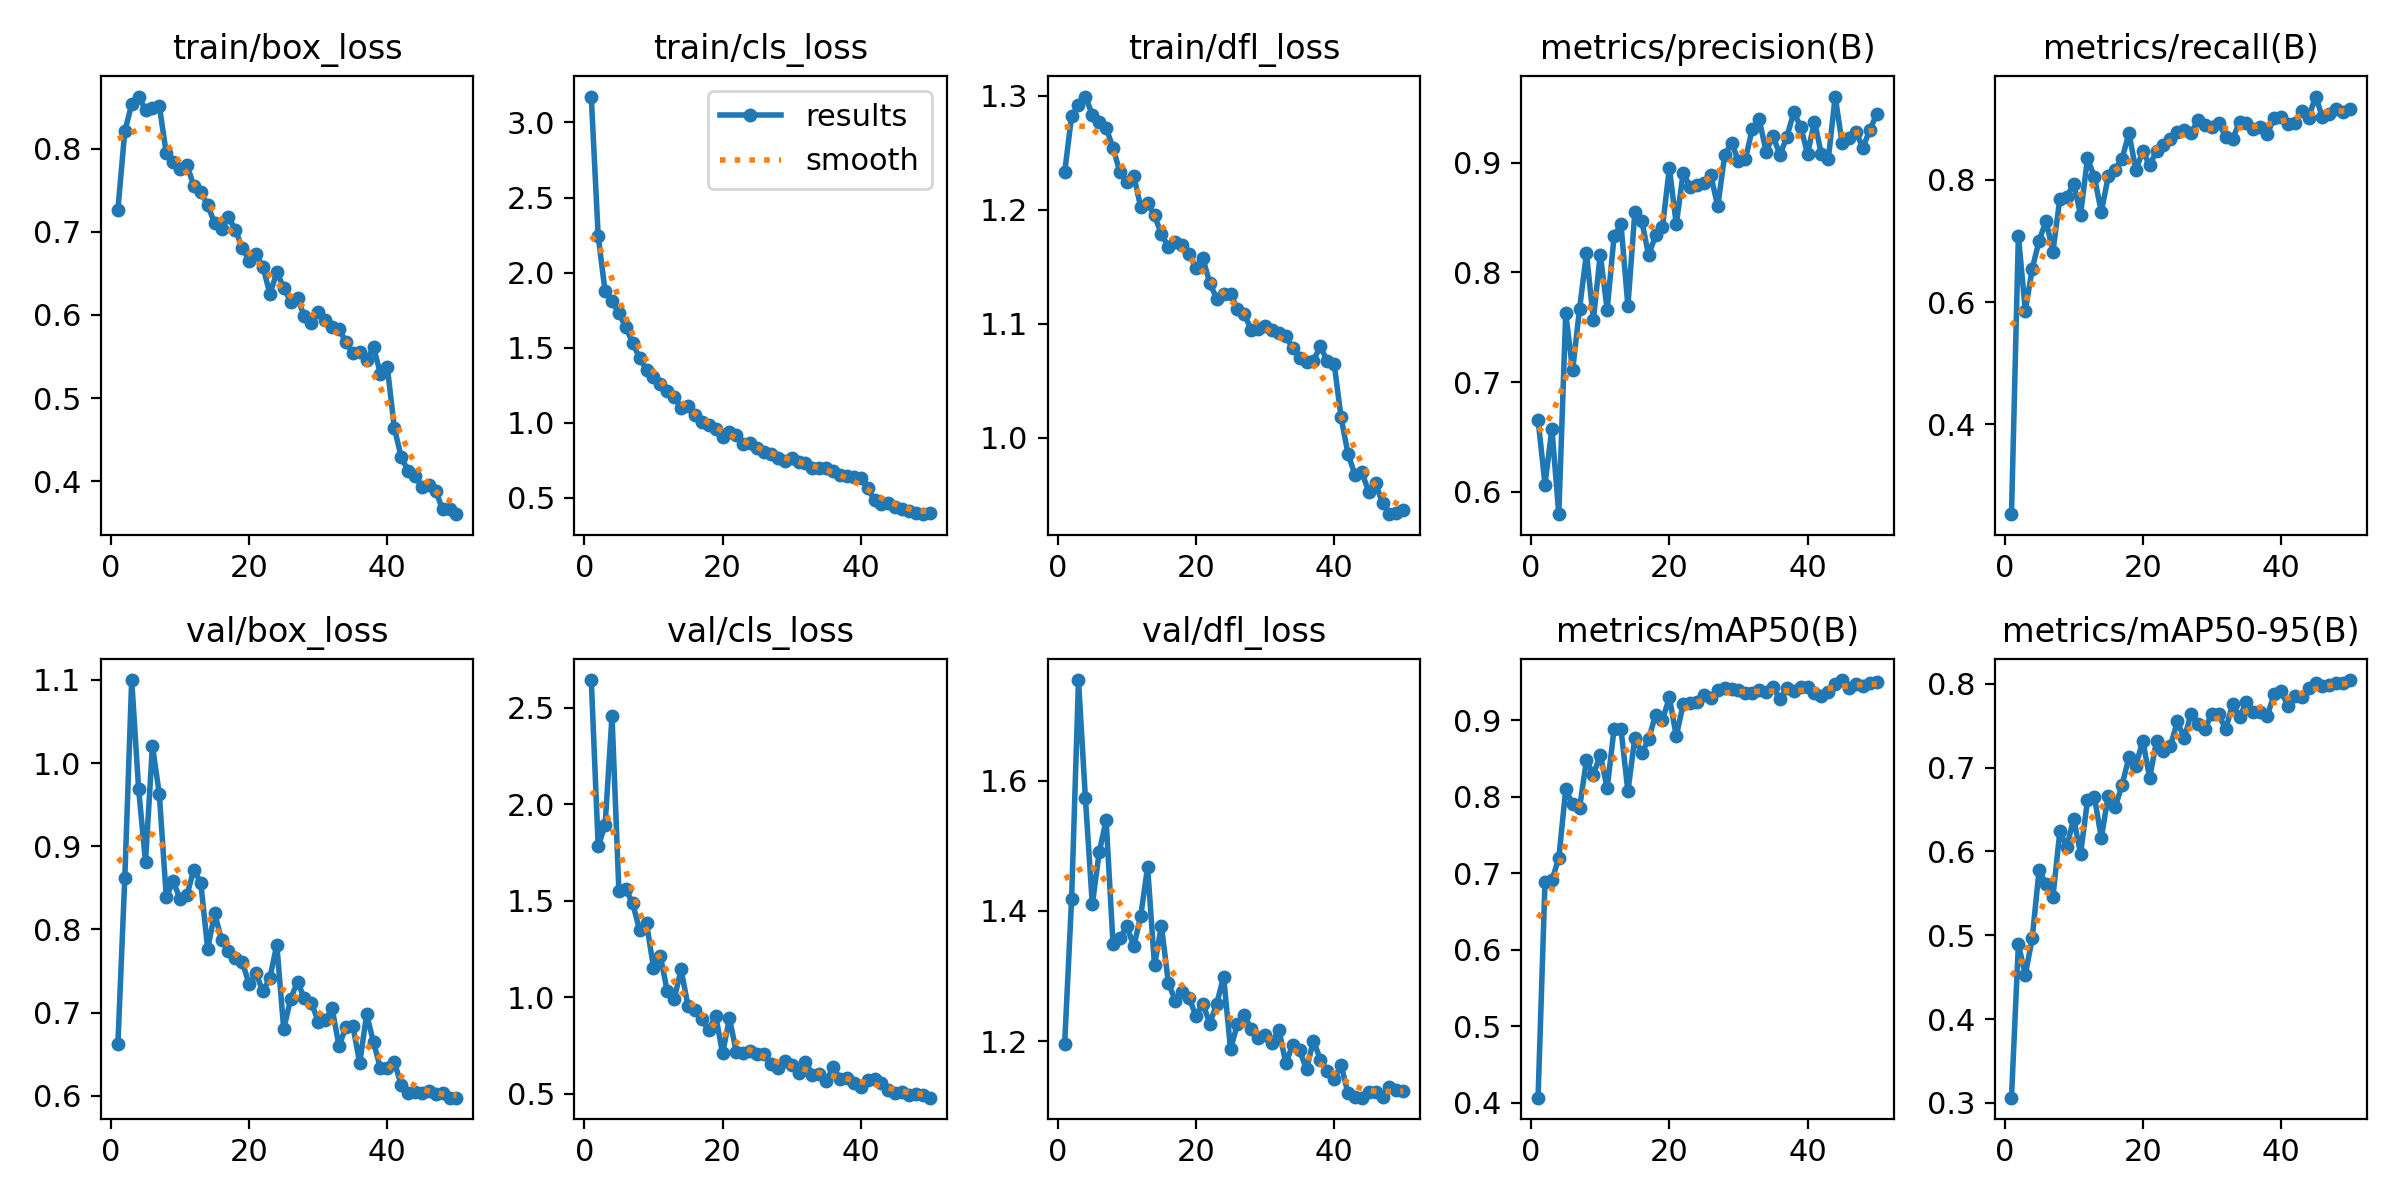

In [25]:
display(Image(filename="runs/detect/train/results.png", width=1000))

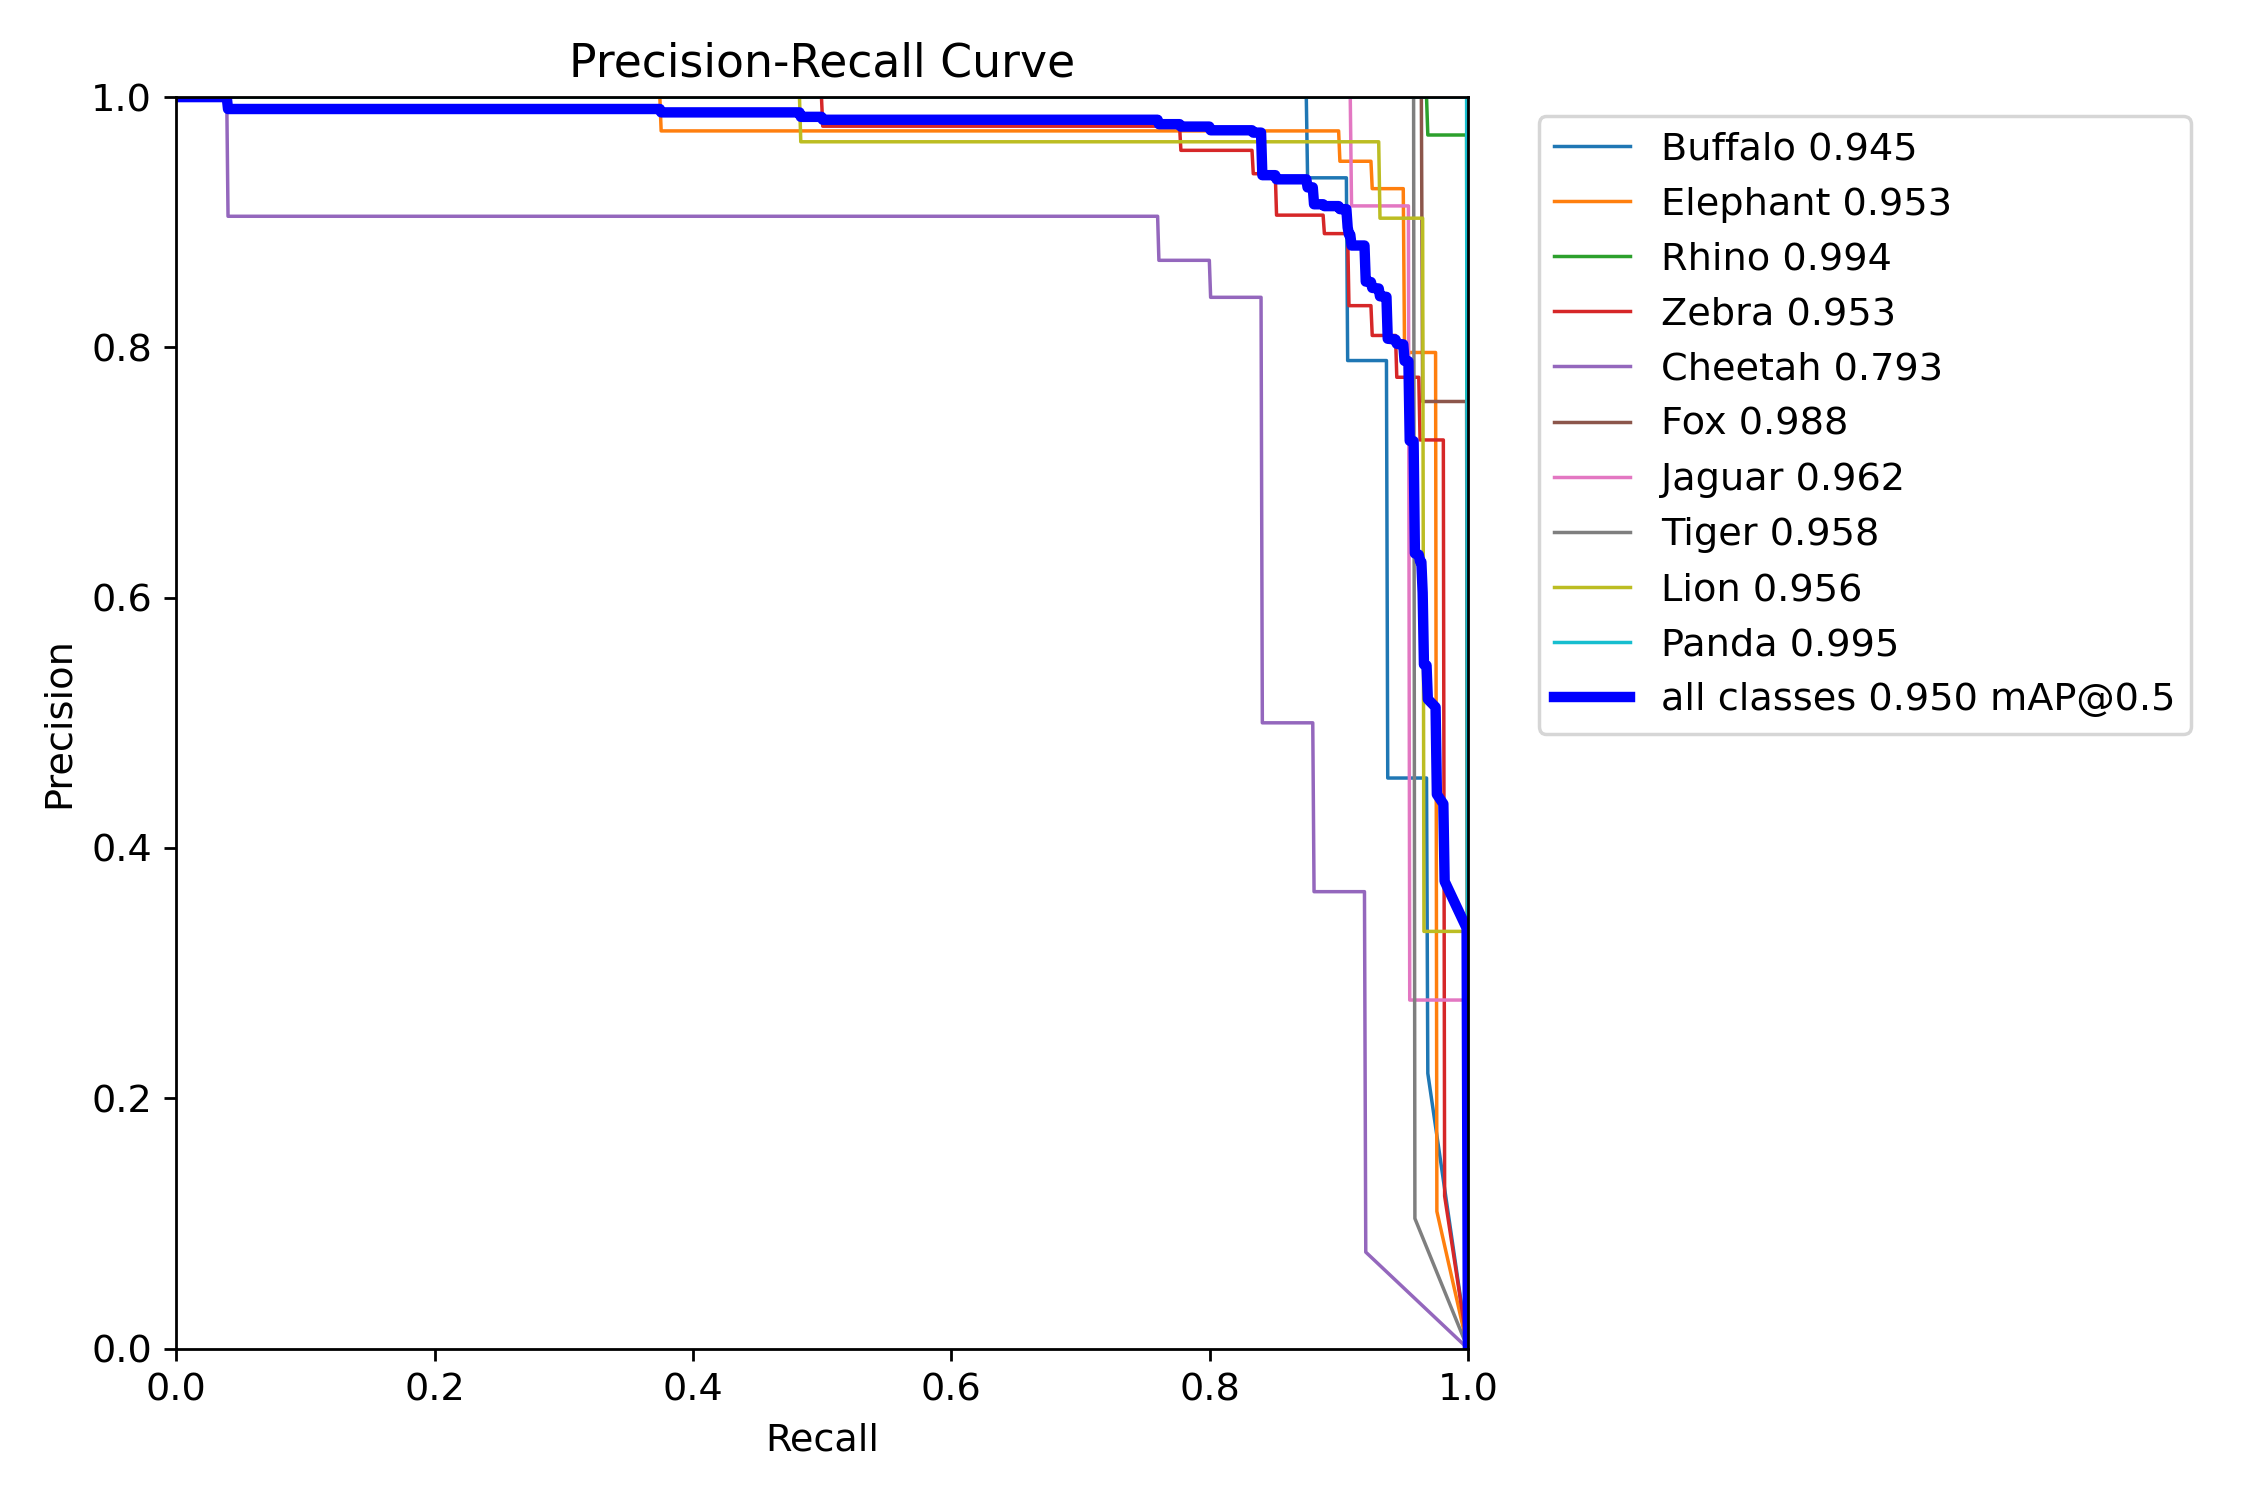

In [26]:
display(Image(filename="runs/detect/train/PR_curve.png", width=1000))

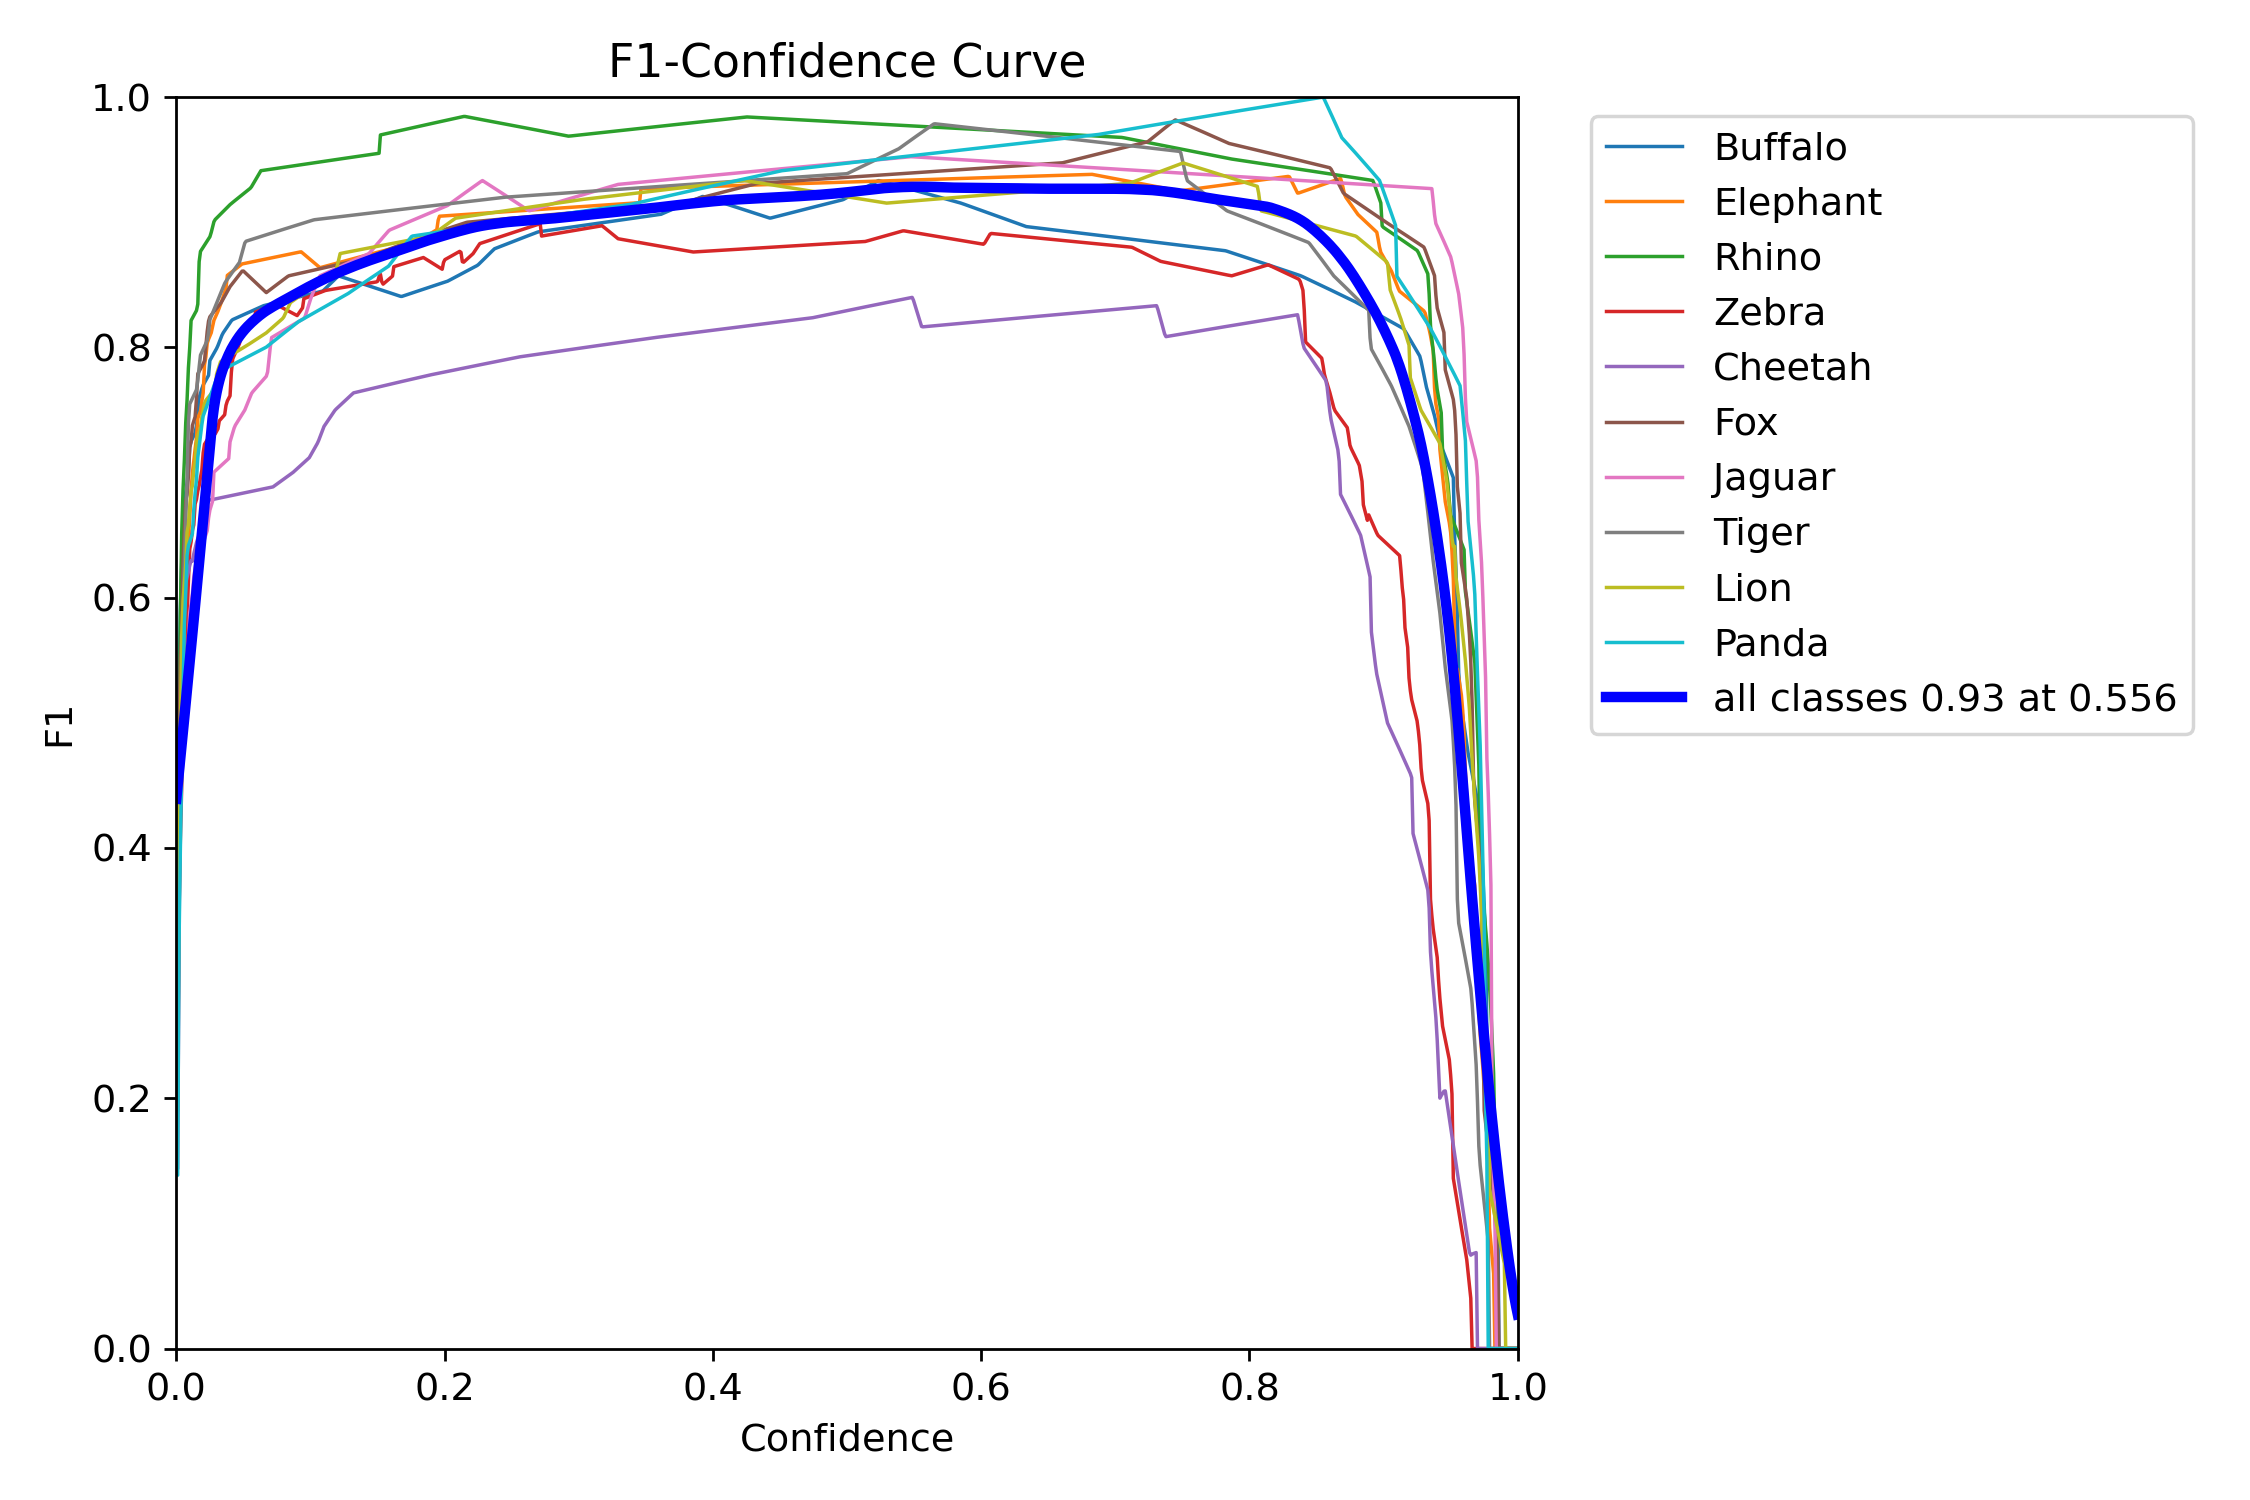

In [27]:
display(Image(filename="runs/detect/train/F1_curve.png", width=1000))

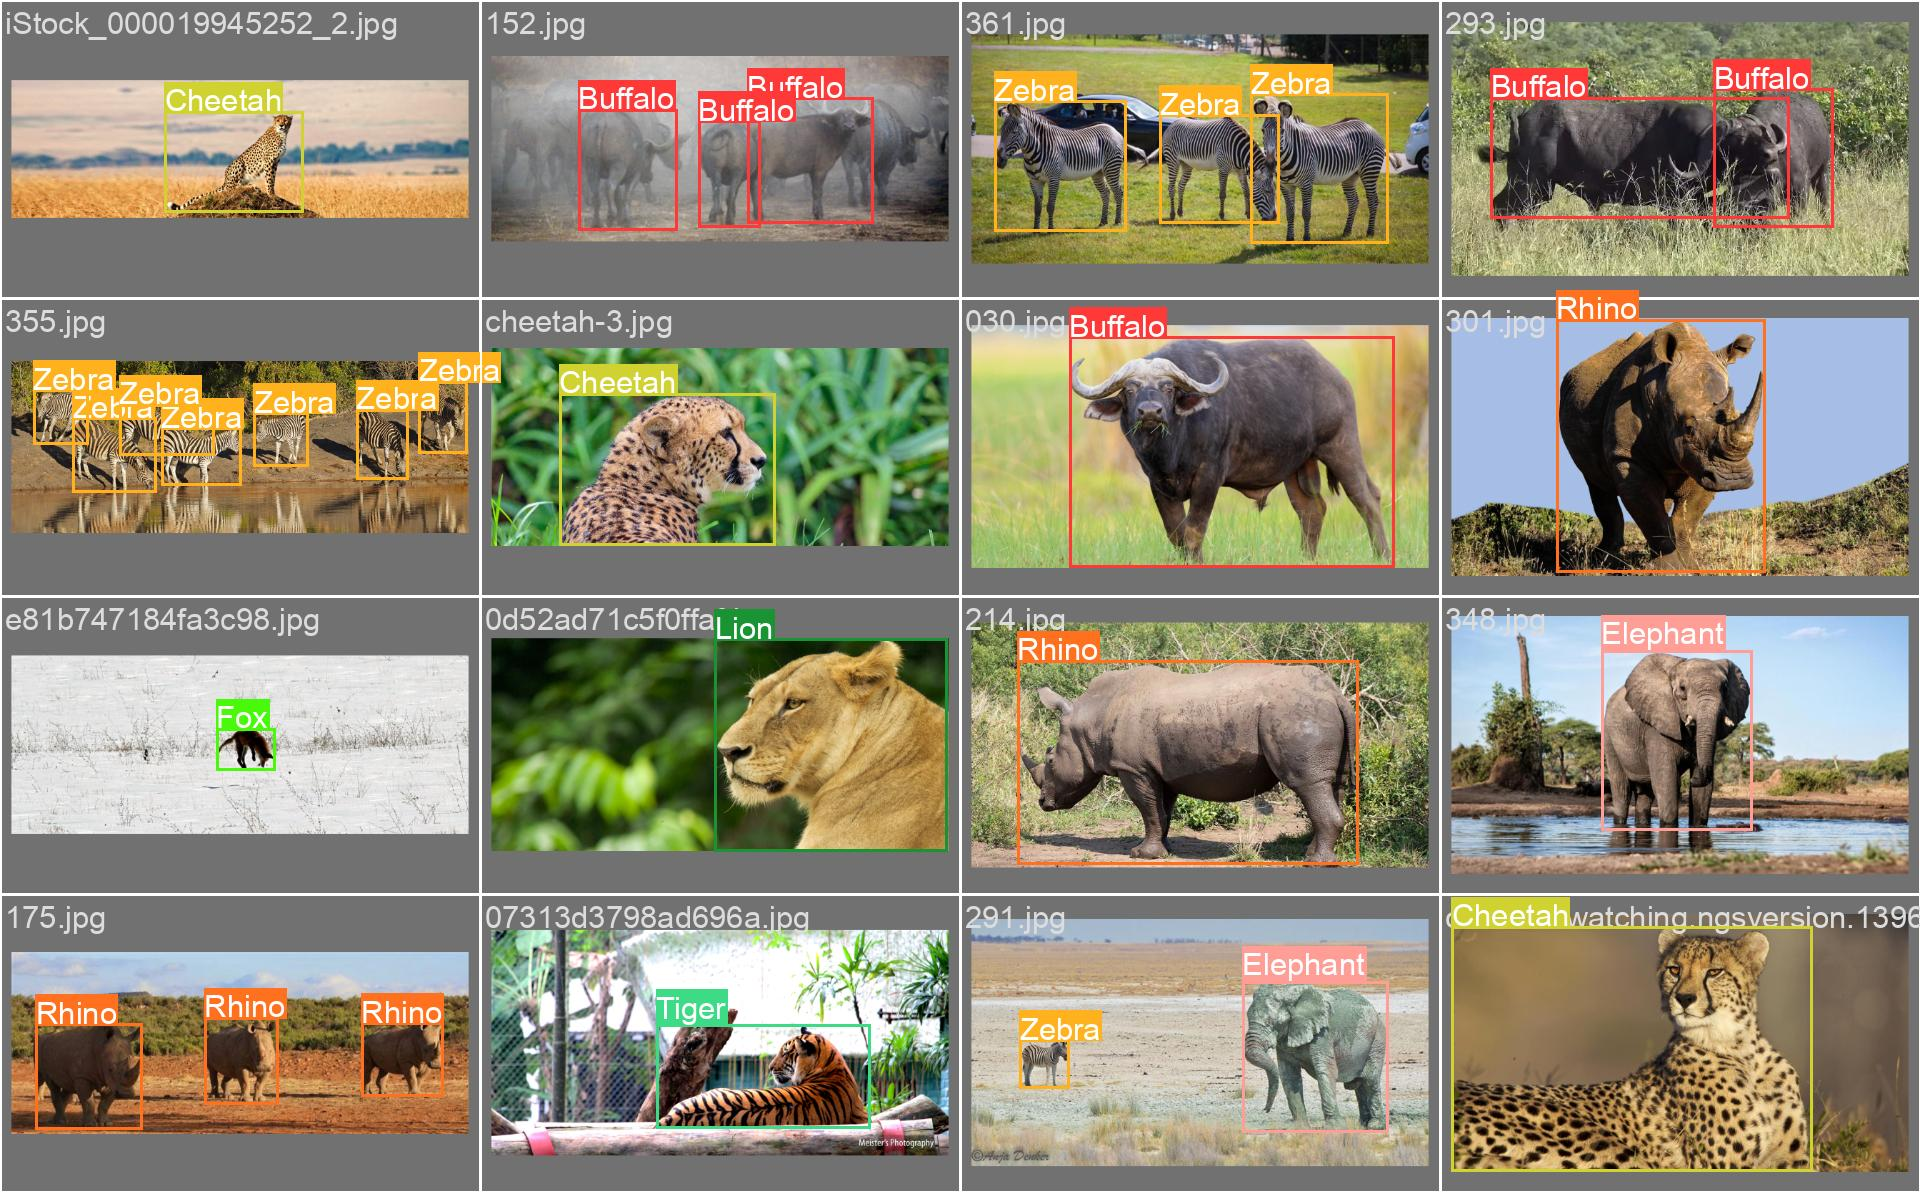

In [43]:
display(Image(filename="runs/detect/train/val_batch0_labels.jpg", width=1000))

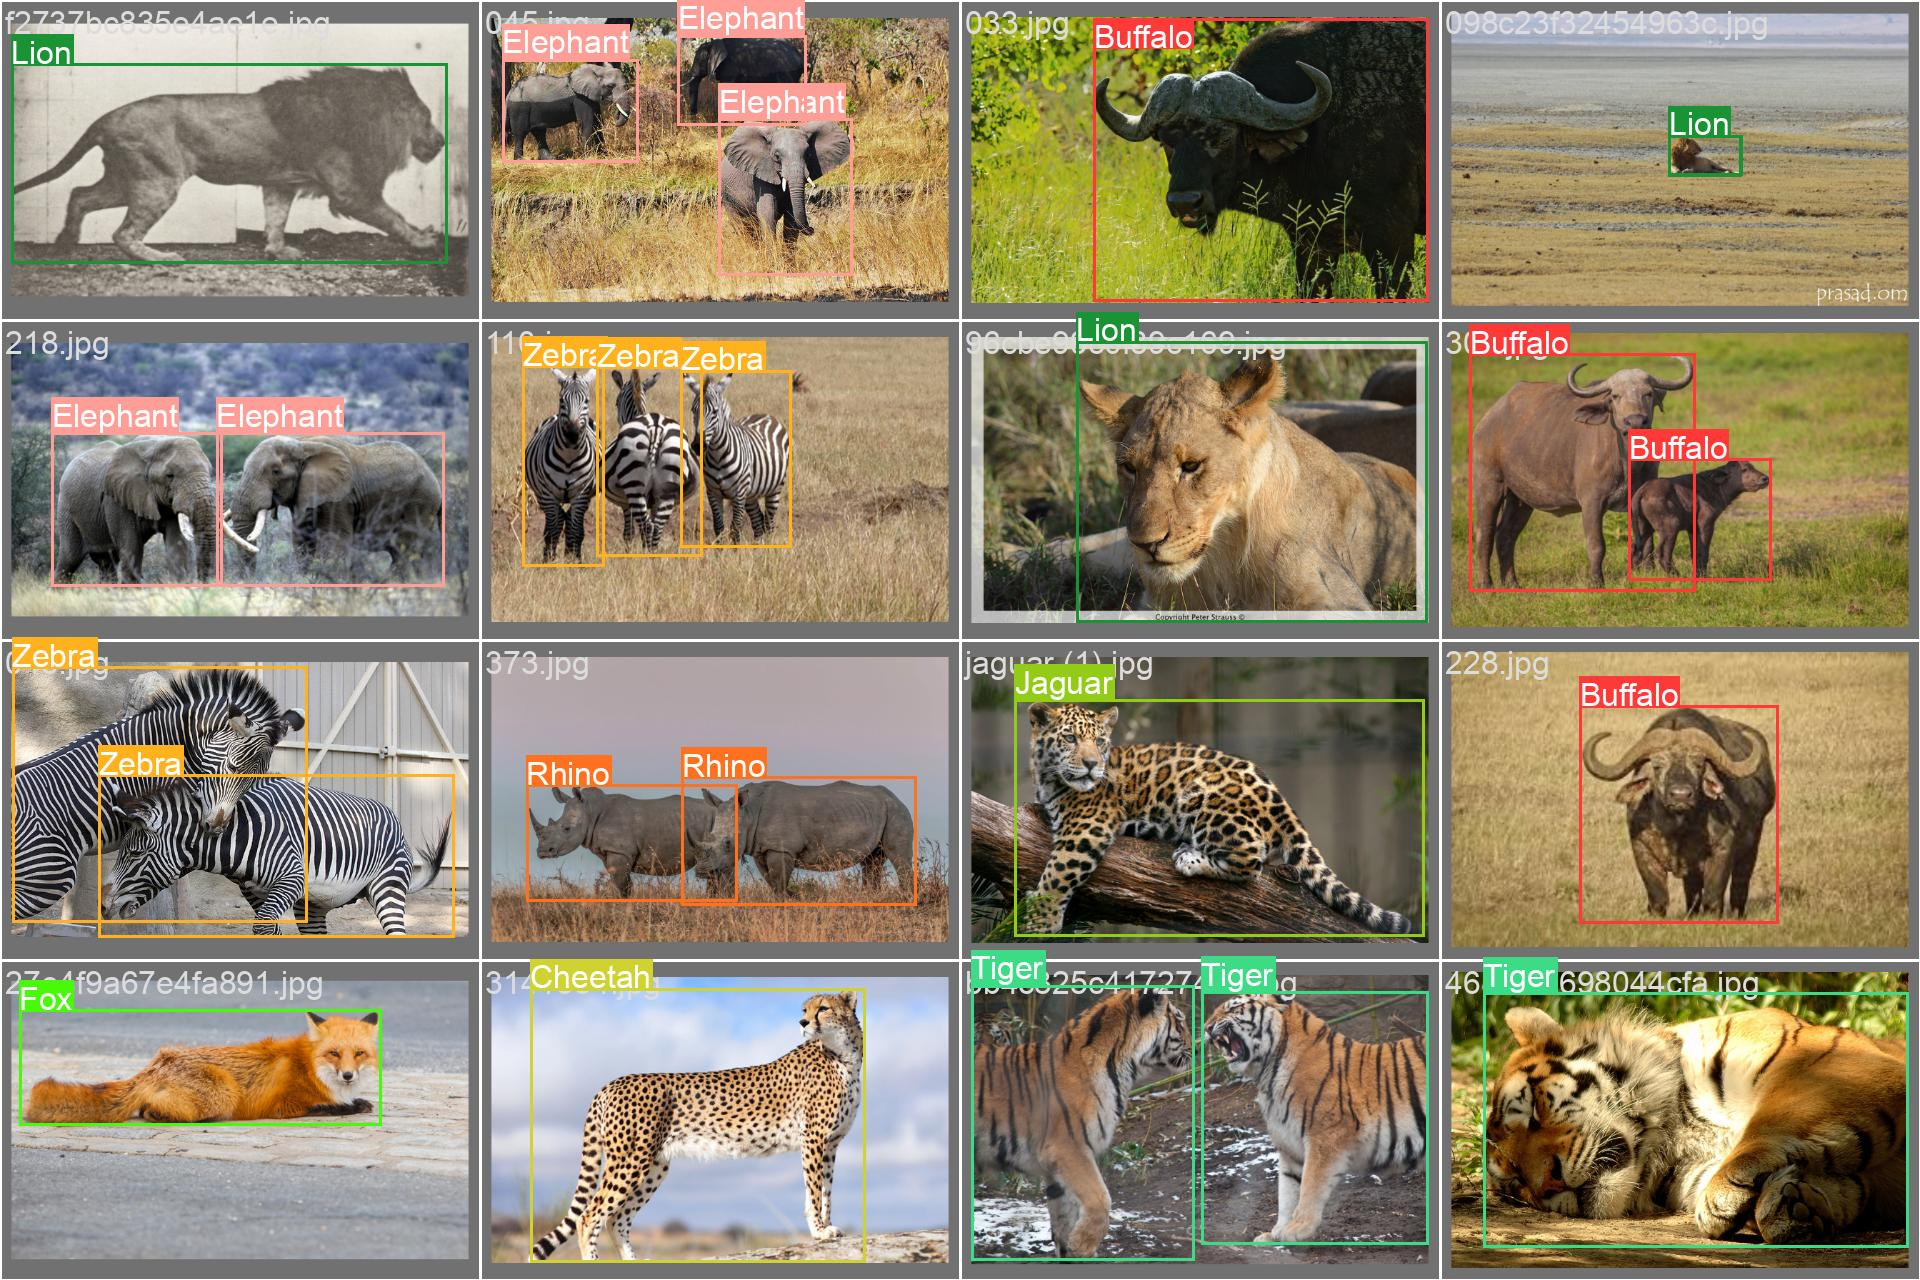

In [45]:
display(Image(filename="runs/detect/train/val_batch1_labels.jpg", width=1000))

## Inference

### Evaluate the model on the test dataset.


In [32]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data=custom.yaml split=test

d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\nn\tasks.py:560: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return to

## Visualize the test output

In [33]:
!ls 'runs/detect/val'

'ls' is not recognized as an internal or external command,
operable program or batch file.


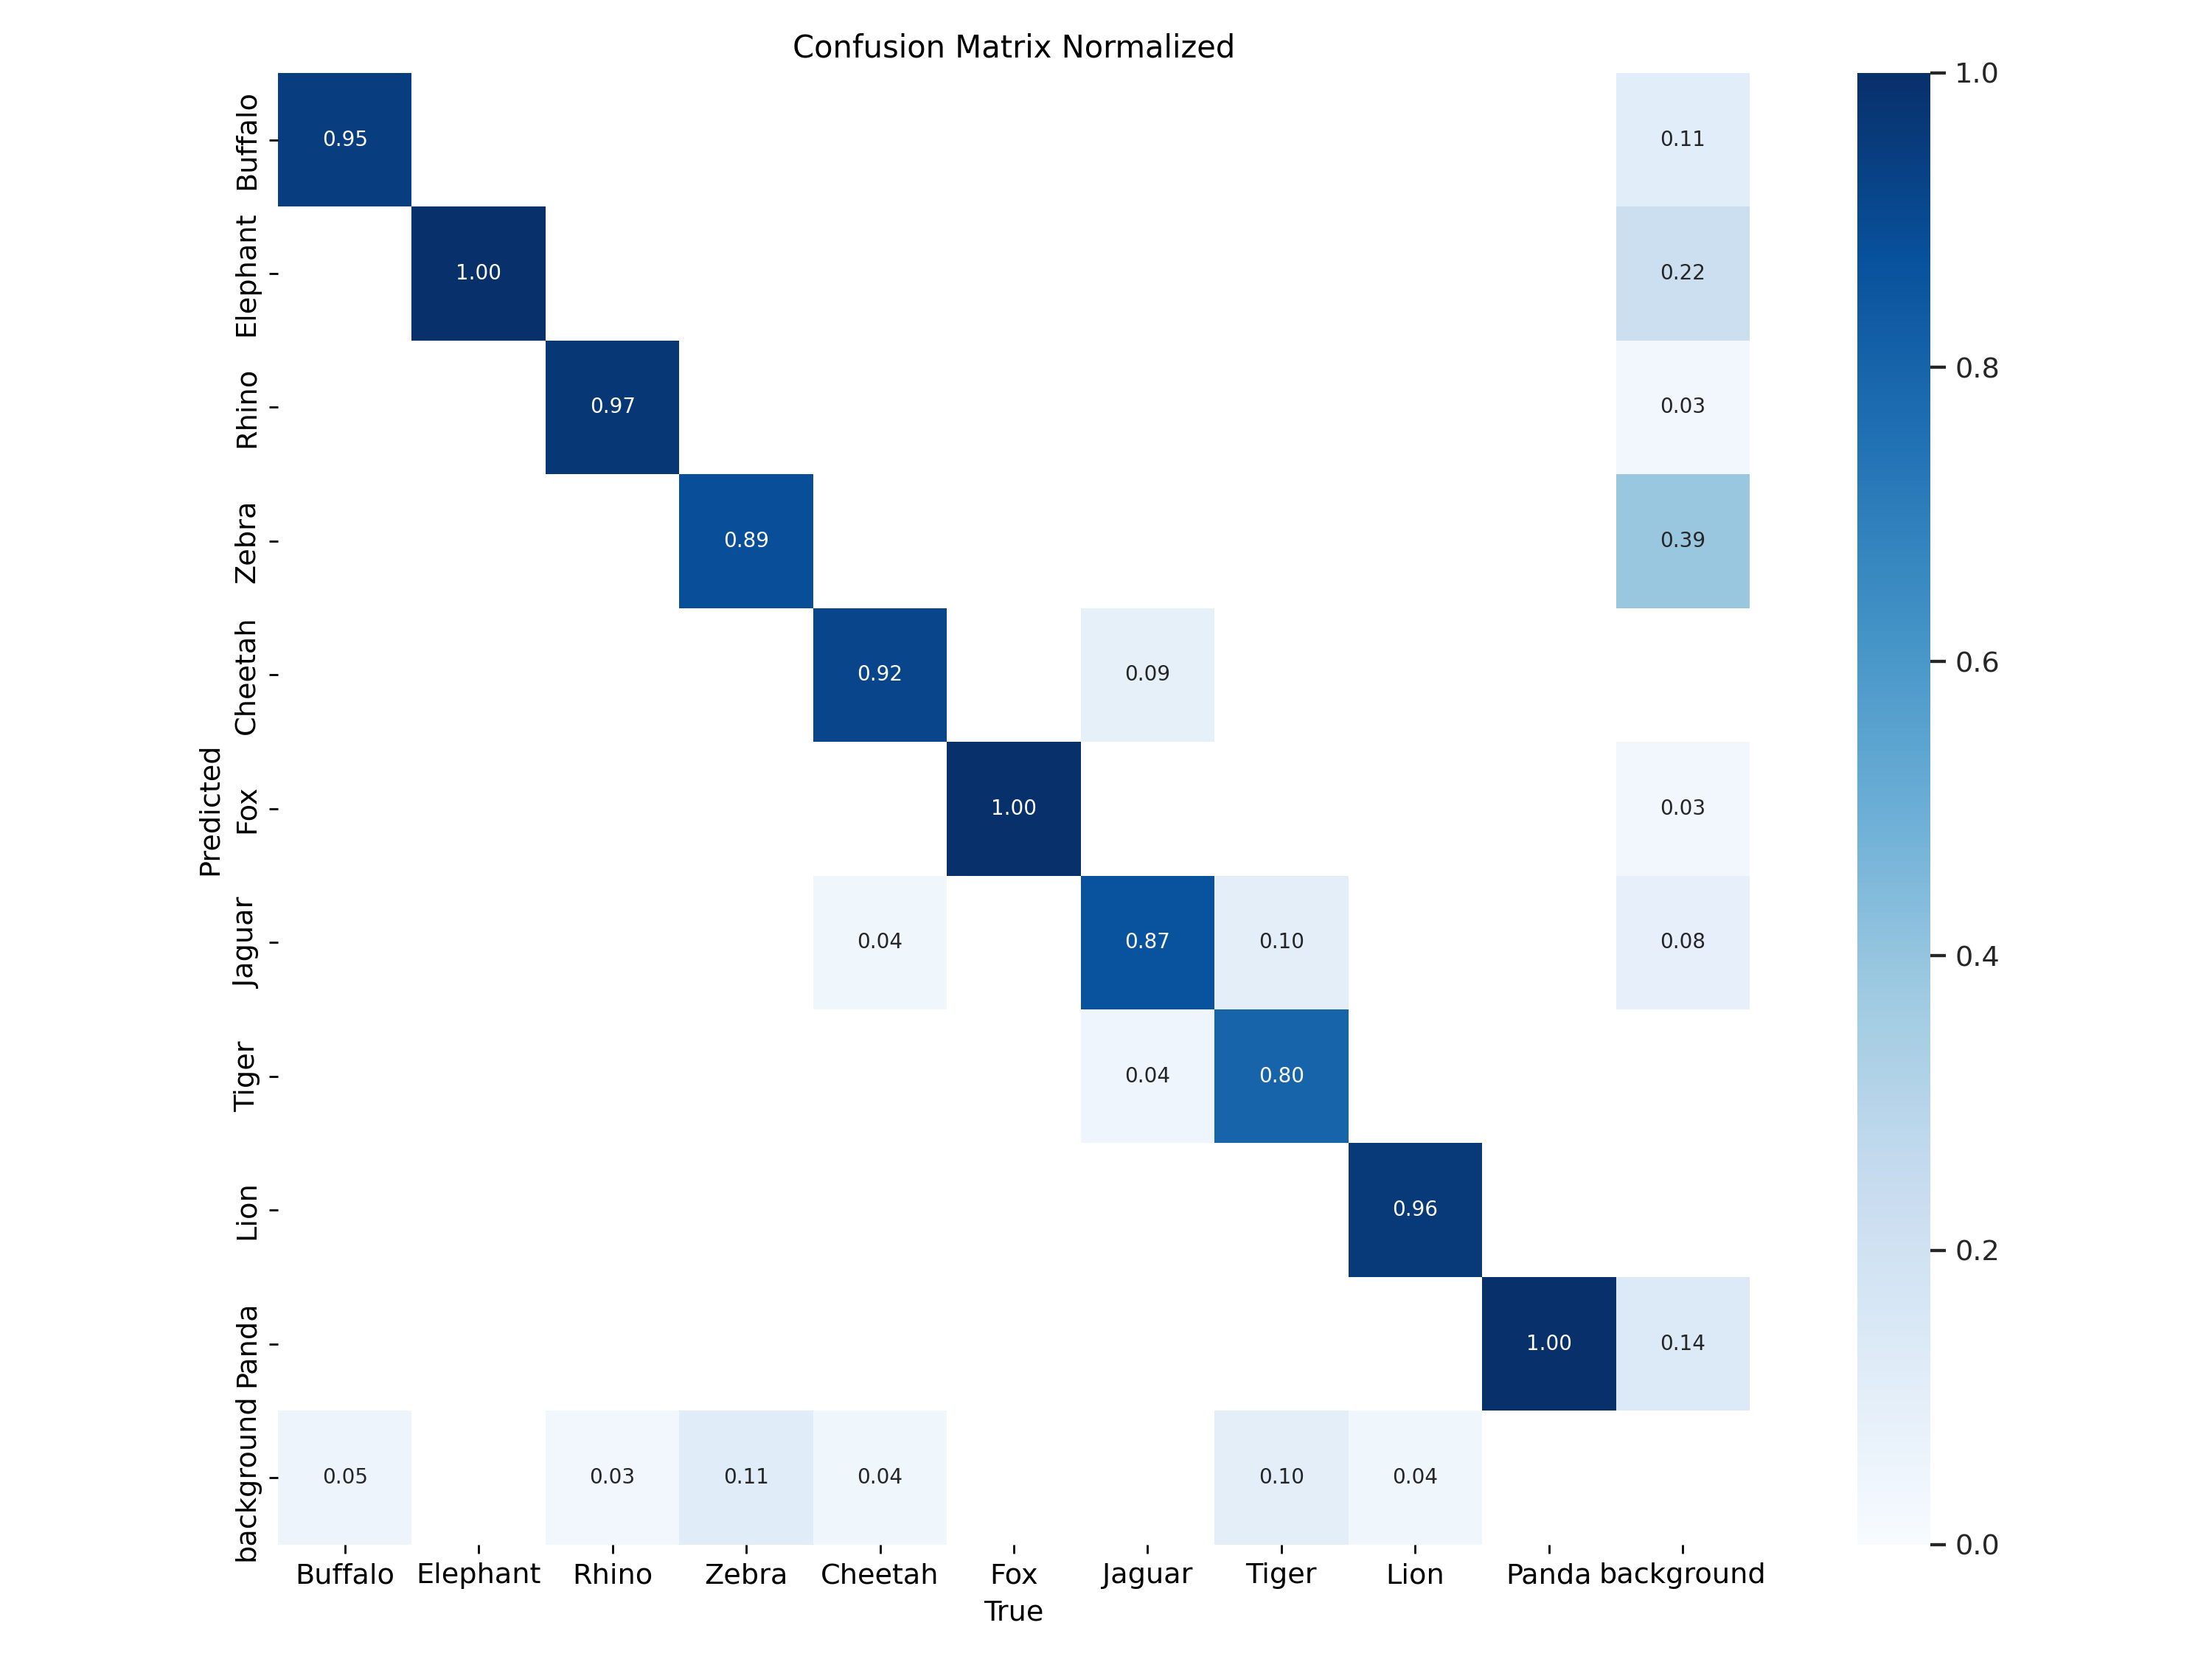

In [35]:
display(Image(filename="runs/detect/val/confusion_matrix_normalized.png", width=1000))

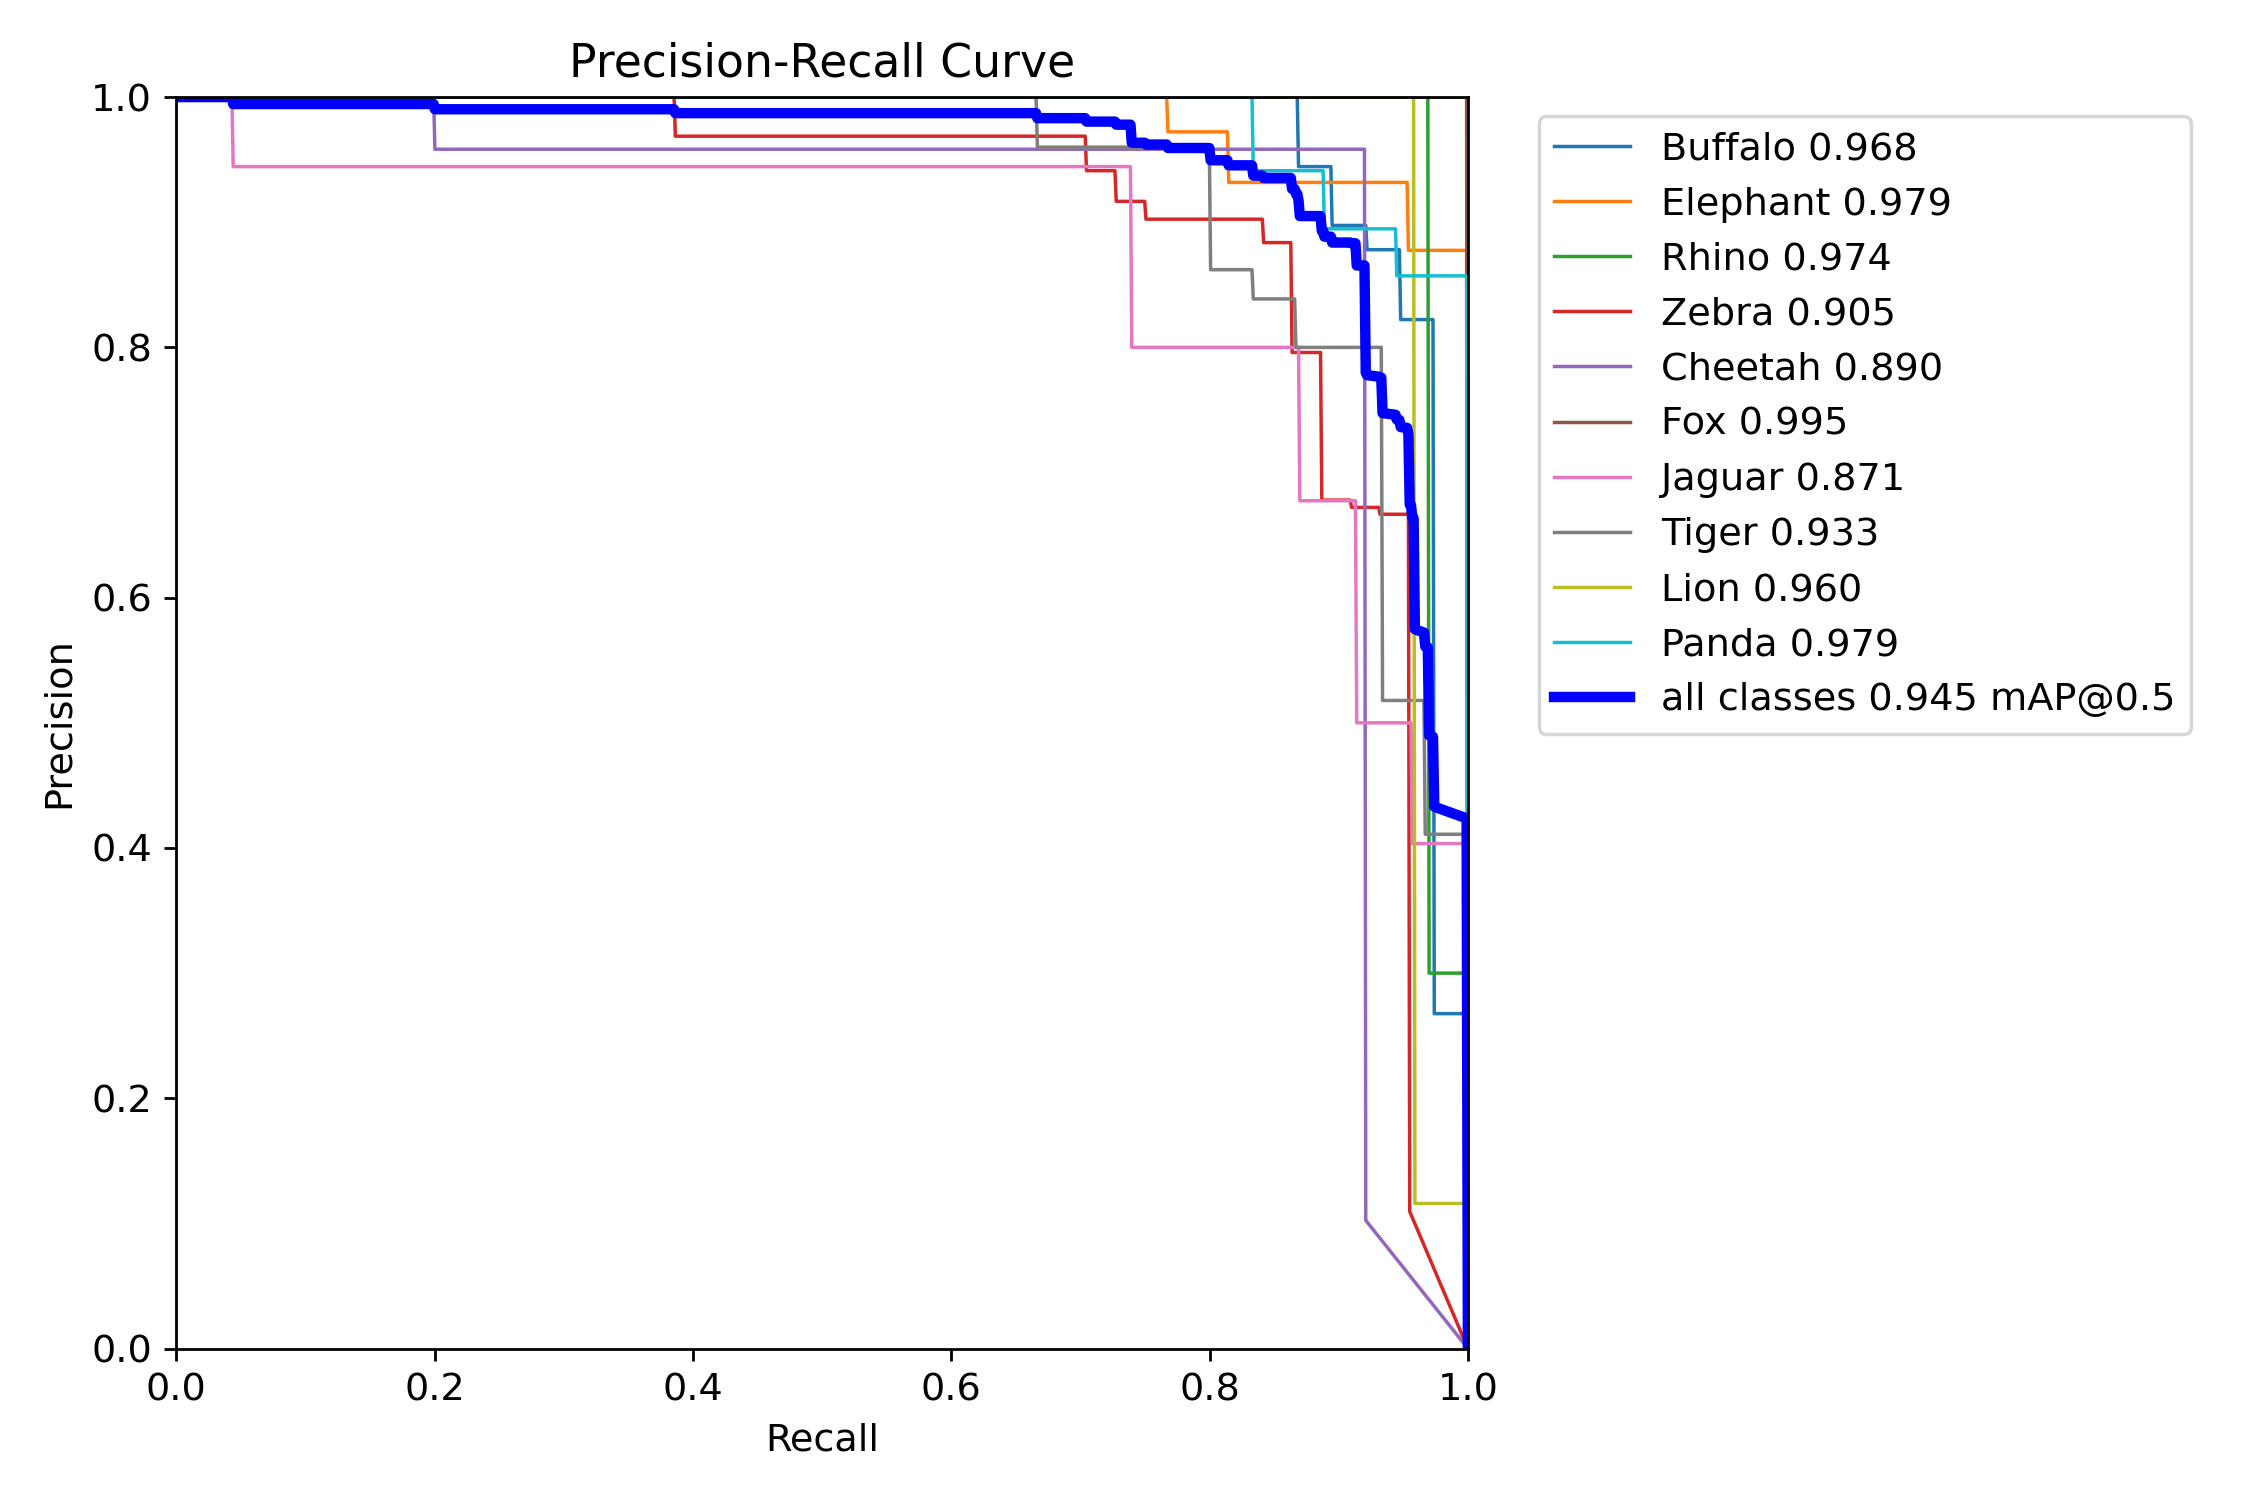

In [36]:
display(Image(filename="runs/detect/val/PR_curve.png", width=1000))

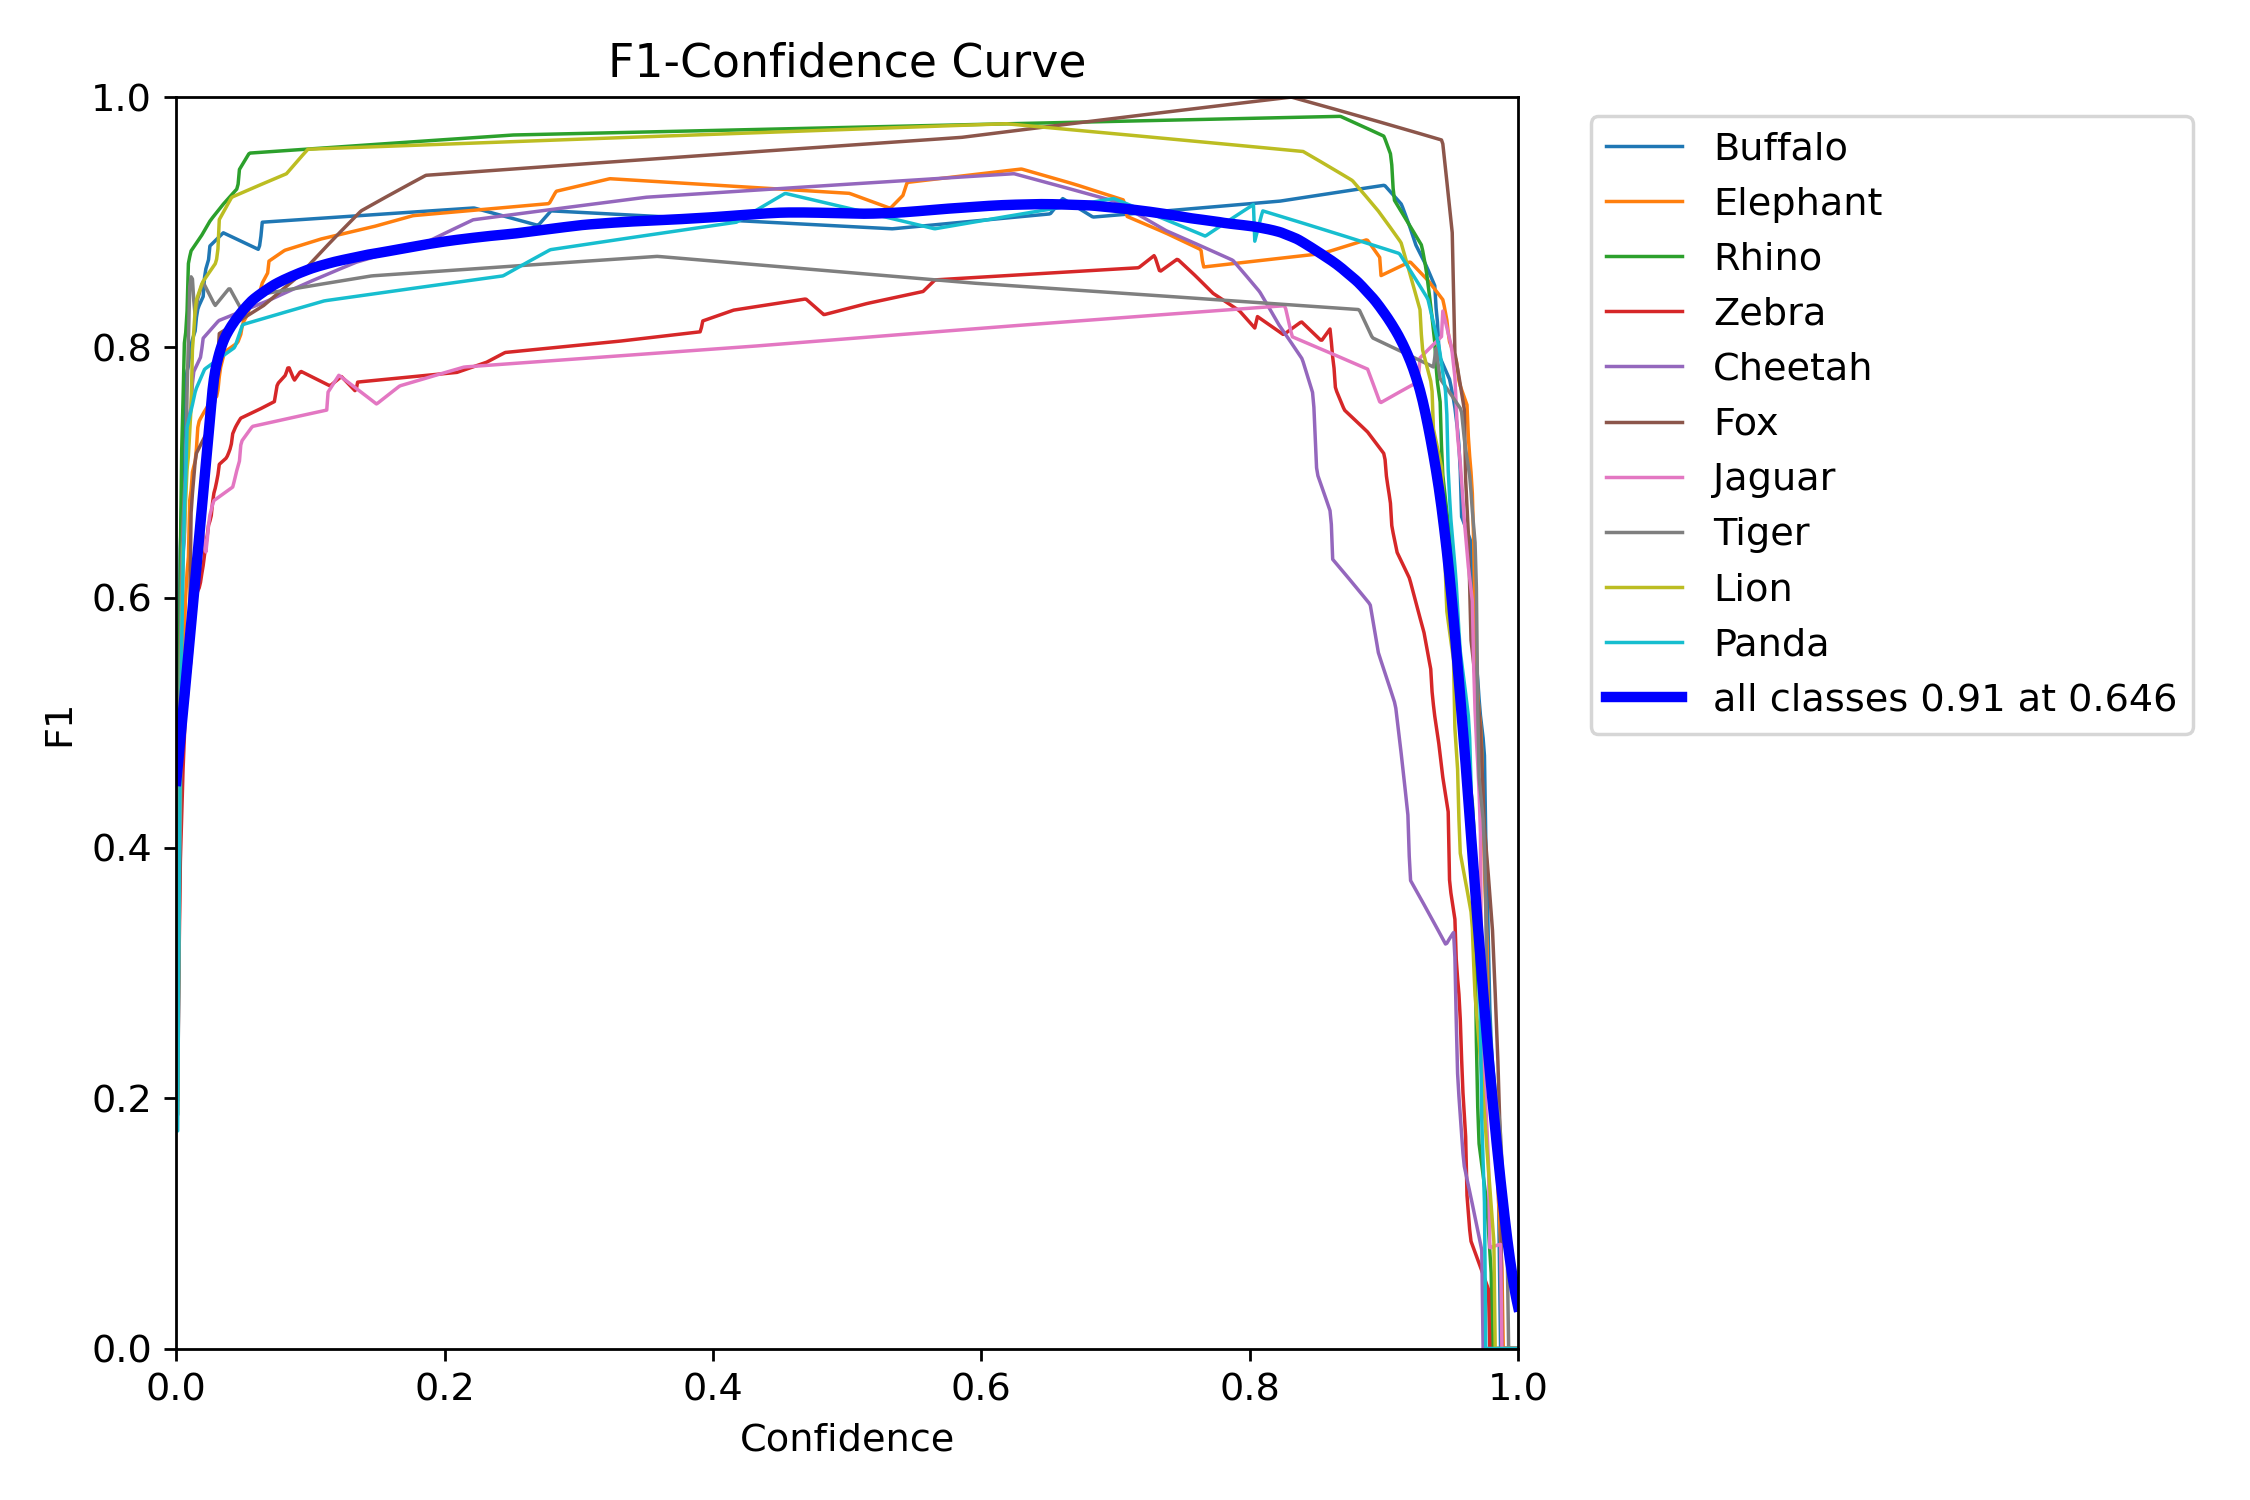

In [37]:
display(Image(filename="runs/detect/val/F1_curve.png", width=1000))

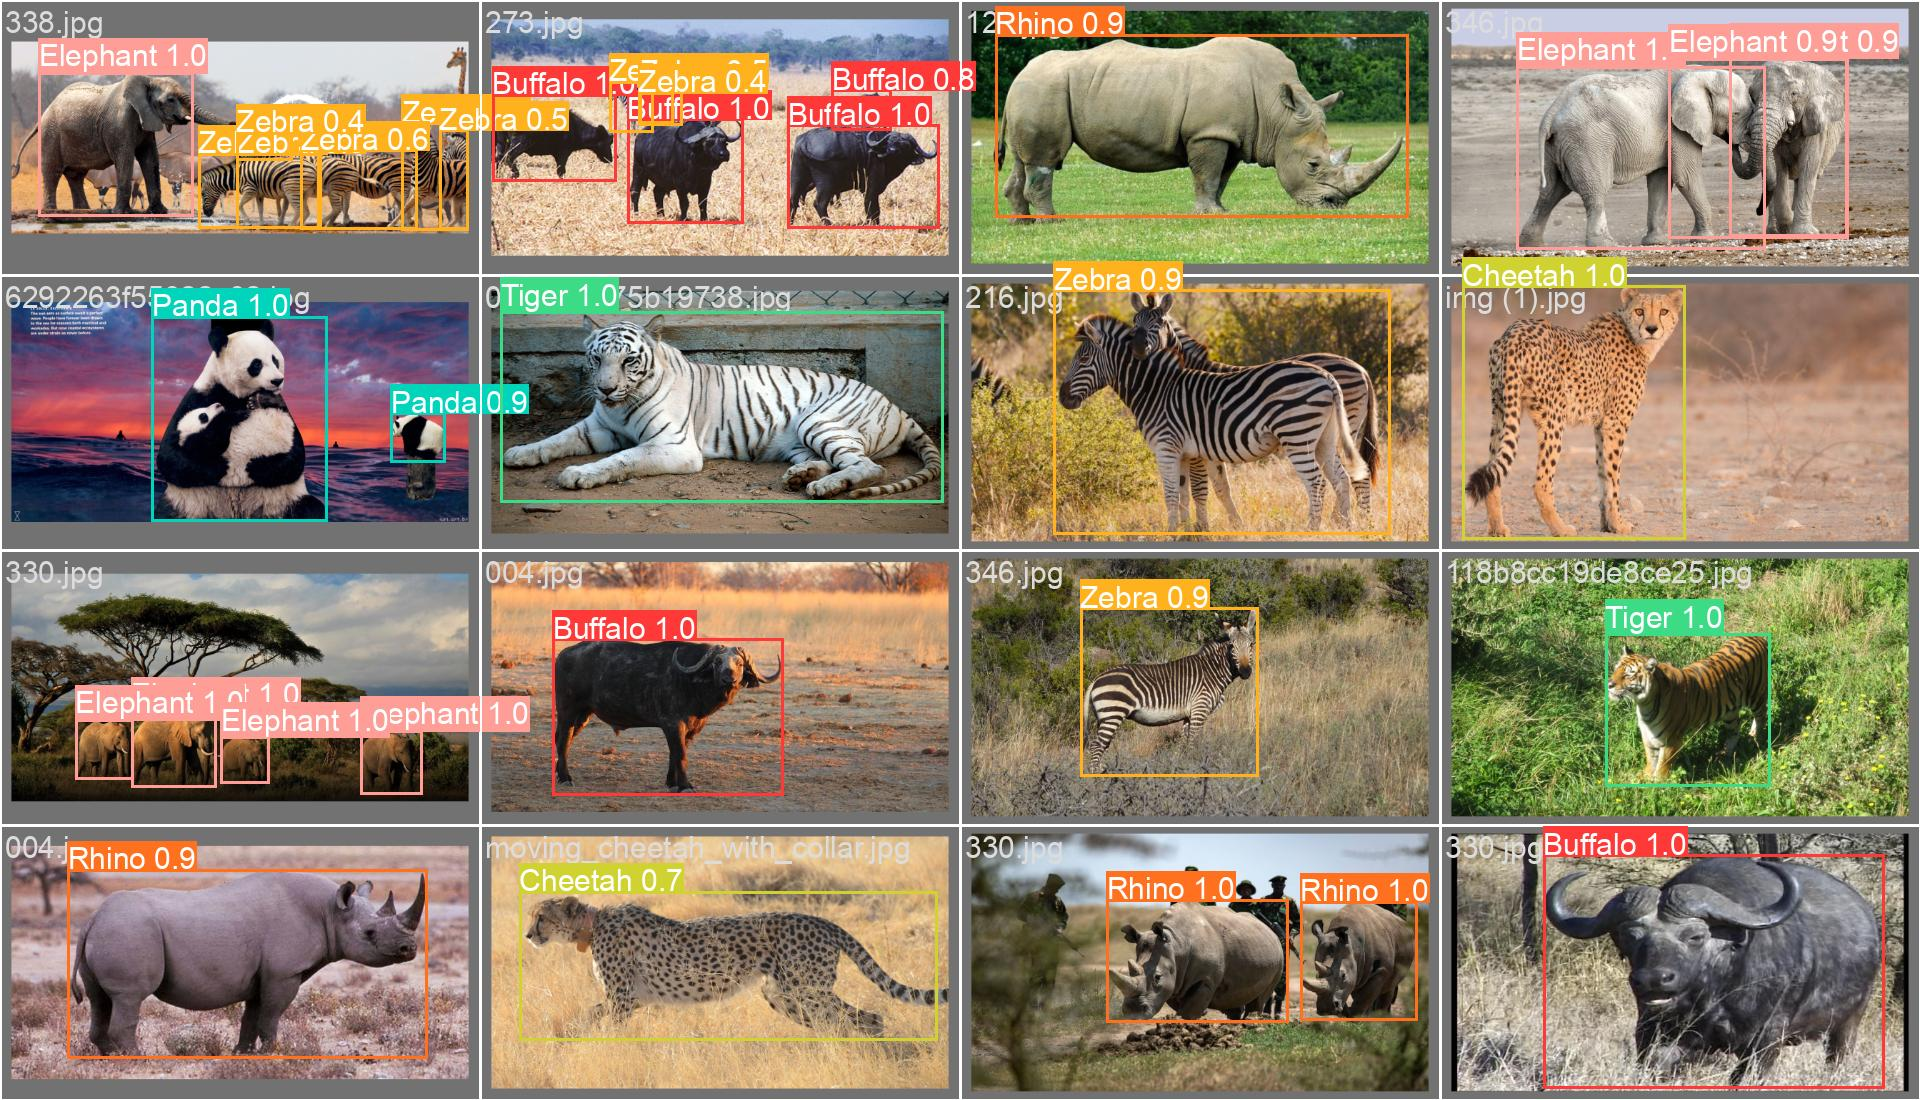

In [38]:
display(Image(filename="runs/detect/val/val_batch0_pred.jpg", width=1000))

## Inference

In [39]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.35 source=data/test save=True

d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\nn\tasks.py:560: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return to

In [40]:
img_path = glob.glob(f'./runs/detect/predict/*')

for img in img_path:
  display(Image(filename=img, width=500))
  print('\n')

## Export

In [41]:
!yolo export model=yolov8n_saved_model/yolov8n.h5 format=saved_model

Traceback (most recent call last):
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\Scripts\yolo.exe\__main__.py", line 7, in <module>
    sys.exit(entrypoint())
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\cfg\__init__.py", line 396, in entrypoint
    model = YOLO(model, task=task)
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\engine\model.py", line 94, in __init__
    self._load(model, task)
  File "d:\Python\Data Science Project\Real-Time-Animal-Species-Detection\venv\lib\site-packages\ultralytics\engine\model.py", l